In [21]:
import numpy as np
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram

In [12]:
#IBMQ.save_account(TOKEN)
provider = IBMQ.load_account()

In [16]:
def dj_oracle(n, case):
    
    qc = QuantumCircuit(n+1)
    
    if case == "balanced":
        #randomly encode identity or negation for each bit
        b = np.random.randint(1,2**n)
        b_str = format(b, '0'+str(n)+'b')
        
        #apply encoding
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                qc.x(qubit)
        
        for qubit in range(n):
            qc.cx(qubit, n)
        
        for qubit in range(len(b_str)):
            if b_str[qubit] == '1':
                qc.x(qubit)
            
    if case == "constant":
        rand = np.random.randint(2)
        if rand == 1: #encoding constant-1
            qc.x(n)
    
    return qc

In [14]:
def dj_algorithm(n, case = 'random'):
    qc = QuantumCircuit(n+1, n)
    
    for qubit in range(n):
        qc.h(qubit)
    
    qc.x(n)
    qc.h(n)
    
    if case == 'random':
        rand = np.random.randint(2)
        if rand == 1:
            case = 'balanced'
        else:
            case = 'constant'
            
    oracle = dj_oracle(n, case)
    oracle = oracle.to_gate()
    oracle.name = "Oracle"
    
    qc.append(oracle, range(n+1))
    
    for qubit in range(n):
        qc.h(qubit)
        qc.measure(qubit, qubit)
        
    return qc   

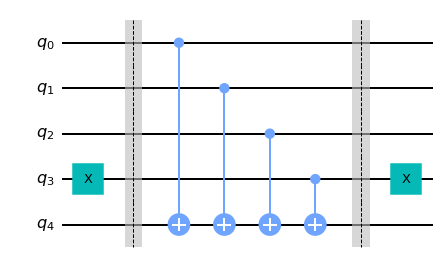

In [10]:
n = 4
qc = dj_oracle(n, 'balanced')
qc.draw(output='mpl')

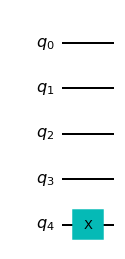

In [25]:
n = 4
qc = dj_oracle(n, 'constant')
qc.draw(output='mpl')

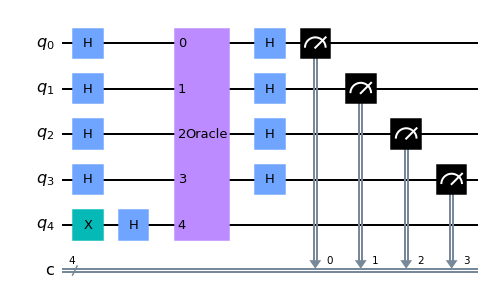

In [17]:
n = 4
qc = dj_algorithm(n)
qc.draw(output='mpl')

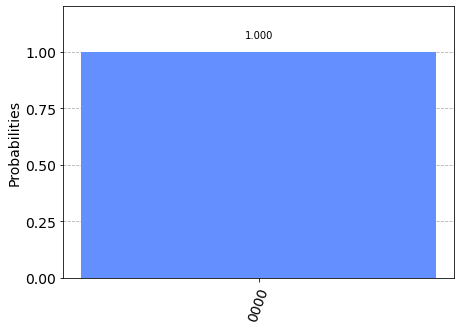

In [18]:
qc = dj_algorithm(n, 'constant')

sim = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = sim, shots = 1).result()
counts = result.get_counts()
plot_histogram(counts)

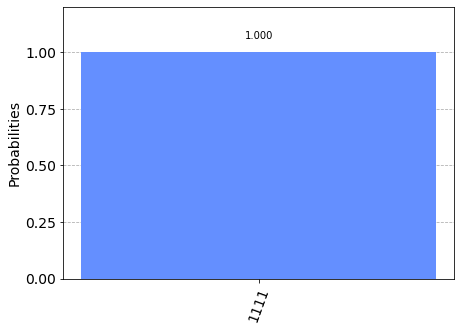

In [19]:
qc = dj_algorithm(n, 'balanced')

sim = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = sim, shots = 1).result()
counts = result.get_counts()
plot_histogram(counts)

In [22]:
n = 4

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                      not x.configuration().simulator and x.status().operational==True))

print("Least busy: ", backend)
%qiskit_job_watcher
qc = dj_algorithm(n, 'constant')
job = execute(qc, backend=backend, shots=1024, optimization_level=3)

Least busy:  ibmq_manila


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

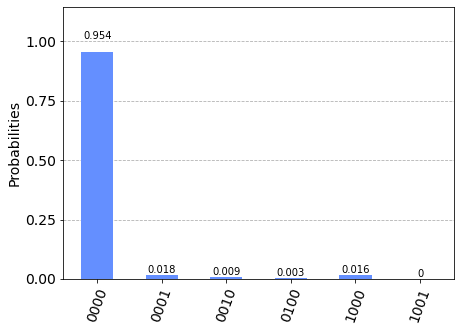

In [23]:
counts = job.result().get_counts()
plot_histogram(counts)

In [24]:
n = 4

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                      not x.configuration().simulator and x.status().operational==True))

print("Least busy: ", backend)
%qiskit_job_watcher
qc = dj_algorithm(n, 'balanced')
job = execute(qc, backend=backend, shots=1024, optimization_level=3)

Least busy:  ibmq_manila


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

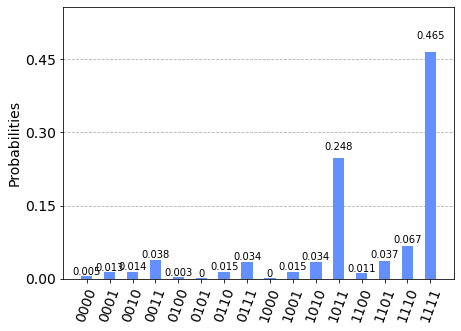

In [25]:
counts = job.result().get_counts()
plot_histogram(counts)